In [109]:
import re
from pathlib import Path

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib import pyplot as plt

In [44]:
input_text = Path("input_data/13").read_text()

In [45]:
test_input1 = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5"""

In [49]:
def parse_input(text):
    dots = []
    folds= []
    # for line in text.split("\n"):

    dot_pattern = re.compile(r"(?P<x>\d+),(?P<y>\d+)")
    fold_instruction_pattern = re.compile(r"fold along (?P<axis>[xy])=(?P<index>\d+)")
    for res in dot_pattern.finditer(text):
        dots.append((int(res["x"]), int(res["y"])))

    for res in fold_instruction_pattern.finditer(text):
        folds.append((res["axis"], int(res["index"])))

    max_x = max(dots, key=lambda x: x[0])[0]
    max_y = max(dots, key=lambda x: x[1])[1]


    mat = np.zeros((max_y + 1, max_x + 1), dtype="int8")
    for (x, y) in dots:
        mat[y, x] = 1
    return dots, folds, mat



In [93]:
def fold(mat, axis, index):
    if axis == "x":
        left, right = mat[:, :index], mat[:, index + 1:]
        return np.bitwise_or(left, np.fliplr(right))
    elif axis == "y":
        top, bottom = mat[:index, :], mat[index + 1:, :]
        return np.bitwise_or(top, np.flip(bottom, 0))

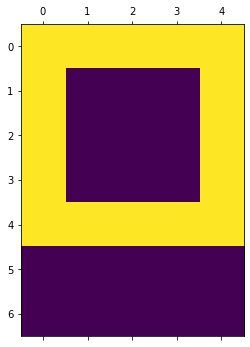

In [95]:
_, folds, mat = parse_input(test_input1)
for axis, index in folds:
    mat = fold(mat, axis, index)
plt.matshow(mat)

In [107]:
_, folds, mat = parse_input(input_text)
for axis, index in folds[:1]:
    mat = fold(mat, axis, index)
# plt.matshow(mat)
print(np.unique(mat, return_counts=True))

(array([0, 1], dtype=int8), array([585460,    765], dtype=int64))


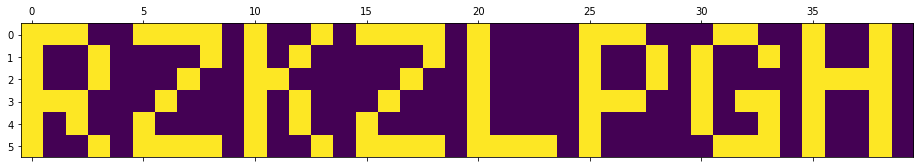

In [96]:
_, folds, mat = parse_input(input_text)
for axis, index in folds:
    mat = fold(mat, axis, index)
plt.matshow(mat)

In [125]:
from ipywidgets import interactive

# output = widgets.Output()
# display(output)
def draw_mat(x):
    _, folds, mat = parse_input(input_text)
    for axis, index in folds[:x]:
        mat = fold(mat, axis, index)
    # with output:
    display(plt.matshow(mat))
    # output.clear_output(wait=True)

slider = widgets.IntSlider(0, 0, len(folds), step=1)
# display(slider)
interactive_plot = interactive(draw_mat, x=(0, len(folds), 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
_ = display(interactive_plot)


interactive(children=(IntSlider(value=6, description='x', max=12), Output(layout=Layout(height='350px'))), _do…